In [1]:
from sqlalchemy import create_engine

import pandas as pd

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.tag import StanfordNERTagger

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from sklearn.metrics import pairwise_distances

import nltk
import string
from functools import reduce
from math import log

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')


#own Kmeans
from kmeans_algorithm import Kmeans

In [2]:
# Init the Wordnet Lemmatizer
lemmatizer = WordNetLemmatizer()

In [3]:
stringDB = "mysql+pymysql://root:@localhost:3306/oerintegrationdb"
# Conexion a la BD
engine = create_engine(stringDB)

In [4]:
query = "SELECT * FROM cleantriple where predicate = 'title' limit 50;"
df = pd.read_sql(query, engine)

In [5]:
#methods
def compute_tf(word_dict, l):
    tf = {}
    sum_nk = len(l)
    for word, count in word_dict.items():
        tf[word] = count/sum_nk
    return tf

def compute_idf(strings_list):
    n = len(strings_list)
    idf = dict.fromkeys(strings_list[0].keys(), 0)
    for l in strings_list:
        for word, count in l.items():
            if count > 0:
                idf[word] += 1
    
    for word, v in idf.items():
        idf[word] = log(n / float(v))
    return idf

def compute_tf_idf(tf, idf):
    tf_idf = dict.fromkeys(tf.keys(), 0)
    for word, v in tf.items():
        tf_idf[word] = v * idf[word]
    return tf_idf

In [6]:
words = []
for t in df['object']:
    t = t.lower()
    for token in t.split():
        words.append(token)
word_set = set(words)

In [7]:
#word dicts
listWordDict = []
for sentence in df['object']:
    word_dict = dict.fromkeys(word_set, 0)
    l_S = sentence.lower().split()
    for word in l_S:
        word_dict[word] += 1
    listWordDict.append(word_dict)

pd.DataFrame(listWordDict)

,reserved),ii:,century,volleyball,technical,issues,"5,",strategies,education,(uga),...,public,openeduc:,principles,engineering,in,middle,college,science:,environmental,sexy
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
#Frecuencia de Termino
listTF = []
for idx,sentence in enumerate(df['object'], start=0):
    l_S = sentence.lower().split()
    listTF.append(compute_tf(listWordDict[idx],l_S))

In [9]:
#frecuencia de documento Inversa
idf = compute_idf(listWordDict)

In [10]:
listTF_IDF = []
for tf in listTF:
    listTF_IDF.append(compute_tf_idf(tf,idf))
#print(listTF_IDF[0])
dataTf_Idf = pd.DataFrame(listTF_IDF)
dataTf_Idf

,reserved),ii:,century,volleyball,technical,issues,"5,",strategies,education,(uga),...,public,openeduc:,principles,engineering,in,middle,college,science:,environmental,sexy
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.328941,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.292625,0.292625,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.292625,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.355638,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.391202,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.281341,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.292625,0.000000,0.000000,0.000000,0.000000,0.355638,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Running Model Iteration 0 
Running Model Iteration 100 
Running Model Iteration 200 
Running Model Iteration 300 
Running Model Iteration 400 
Running Model Iteration 500 
Model finished running


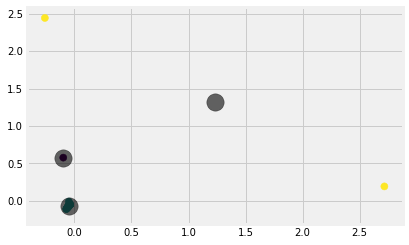

In [11]:
#Implementación propia
sklearn_pca = PCA(n_components = 2)
Y_sklearn = sklearn_pca.fit_transform(dataTf_Idf.values)
test_e = Kmeans(3, 1, 600)
fitted = test_e.fit_kmeans(Y_sklearn)
predicted_values = test_e.predict(Y_sklearn)

plt.scatter(Y_sklearn[:, 0], Y_sklearn[:, 1], c=predicted_values, s=50, cmap='viridis')

centers = fitted.centroids
plt.scatter(centers[:, 0], centers[:, 1],c='black', s=300, alpha=0.6);

[0 1 2]
(array([11]),)
(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 47, 48, 49]),)
(array([ 0, 46]),)


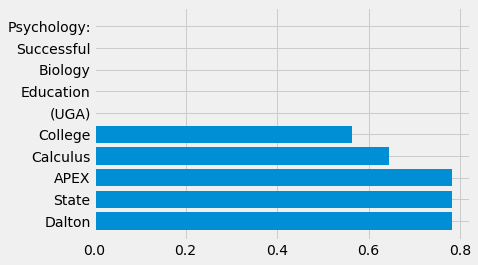

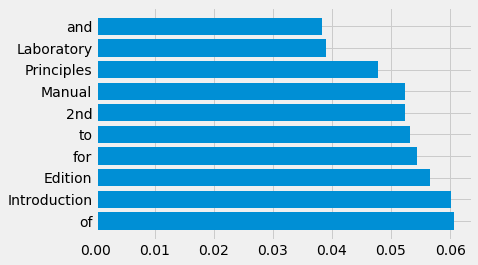

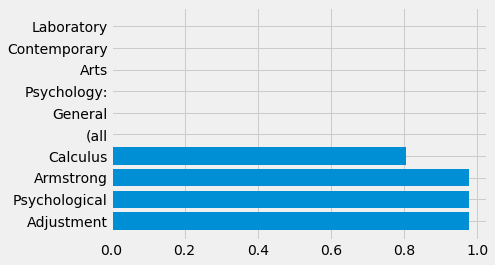

In [46]:
def get_top_features_cluster(tf_idf_array, prediction, n_feats):
    labels = np.unique(predicted_values)
    print(labels)
    dfs = []
    for label in labels:
        id_temp = np.where(predicted_values==label) # indices for each cluster
        print(id_temp)
        x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 20 scores
        features = dataTf_Idf.columns
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns = ['features', 'score'])
        dfs.append(df)
    return dfs
dfs = get_top_features_cluster(dataTf_Idf.values, predicted_values,10)
for d in dfs:
    height = [h[1] for h in d.values]
    bars = [h[0] for h in d.values]
    y_pos = np.arange(len(bars))
    plt.barh(y_pos, height)
    plt.yticks(y_pos, bars)
    plt.show()